### Importing libraries 

In [360]:
import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser
import matplotlib as plt

### Importing Data

In [361]:
df = pd.read_csv('data/ytdataframe.csv')

dff = pd.read_csv(r'C:\Users\wled3\ytunlabeled2.csv')

In [362]:
df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label
0,0,-SejlHOXexc,Tech Tutorial,How to download facebook stories in your phone,Hey friends today we have another great topic ...,"['facebook stories in your phone', 'download f...",2019-11-02T14:25:35Z,969189,11109,NaN,338,PT3M55S,hd,False,140000,8665833,161,0.008202,non reputable
1,1,set4Kr8hX0w,Tech Tutorial,How to check whatsapp lastseen if hidden or bl...,Hello friends welcome to my channel Our today...,['How to check whatsapp lastseen if hidden or ...,2018-01-20T15:35:36Z,1479423,11939,NaN,860,PT4M44S,hd,False,140000,8665833,161,0.298687,non reputable
2,2,s4EYU1ptpIs,Tech Tutorial,How to change voice during call | Male female ...,Hey friends today we have another great topic ...,"['How to change voice during call', 'voice cha...",2021-11-30T17:37:11Z,549044,9211,NaN,335,PT5M21S,hd,False,140000,8665833,161,0.295888,non reputable
3,3,-lcPJAa6trw,Tech Tutorial,How to check who read my message in whatsapp g...,Hey friends today we have another great topic ...,['how to check who read message in whatsapp gr...,2018-05-07T15:12:51Z,323650,5368,NaN,266,PT3M,hd,False,140000,8665833,161,0.296792,non reputable
4,4,G1F6W7QhrWU,Tech Tutorial,How to Record Messenger calls -facebook messen...,Hey friends today we have another great topic ...,"['How to Record Messenger calls', 'facebook me...",2021-10-07T16:18:54Z,42669,323,NaN,23,PT4M23S,hd,False,140000,8665833,161,0.296837,non reputable


In [363]:
df.describe()

,Unnamed: 0,viewCount,likeCount,favouriteCount,commentCount,subscribers,totalViews,totalVideos,avg polarity score
count,145.000000,1.450000e+02,145.000000,0.0,145.000000,1.450000e+02,1.450000e+02,145.000000,145.000000
mean,72.000000,4.303717e+05,9816.793103,NaN,430.613793,7.453005e+05,4.849402e+07,5330.910345,0.327515
std,42.001984,1.022148e+06,22083.515466,NaN,854.799076,1.342649e+06,8.542332e+07,39977.396011,0.034435
min,0.000000,1.880000e+02,2.000000,NaN,1.000000,8.000000e+00,4.940000e+02,4.000000,0.008202
25%,36.000000,2.485100e+04,148.000000,NaN,24.000000,4.870000e+03,1.499221e+06,142.000000,0.316984
50%,72.000000,9.692000e+04,1617.000000,NaN,151.000000,3.020000e+05,1.032953e+07,218.000000,0.340802
75%,108.000000,2.977680e+05,9386.000000,NaN,414.000000,7.810000e+05,5.936878e+07,1057.000000,0.341801
max,144.000000,8.130729e+06,146084.000000,NaN,5359.000000,6.120000e+06,4.099286e+08,342151.000000,0.343017


In [ ]:
df.info()

# Data preprocessing 

Checking duplicates

In [364]:
df.duplicated().sum()


0

In [365]:
df = df.drop_duplicates()
df.shape

(145, 19)

Checking null values

In [366]:
df.isnull().sum()


Unnamed: 0              0
video_id                0
channelTitle            0
title                   0
description             0
tags                   15
publishedAt             0
viewCount               0
likeCount               0
favouriteCount        145
commentCount            0
duration                0
definition              0
caption                 0
subscribers             0
totalViews              0
totalVideos             0
avg polarity score      0
Label                   0
dtype: int64

Convert count columns to numeric

In [367]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

dff[numeric_cols] = dff[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

Convert publish date to year

In [368]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y"))

dff['publishedAt'] = dff['publishedAt'].apply(lambda x: parser.parse(x)) 
dff['pushblishYear'] = dff['publishedAt'].apply(lambda x: x.strftime("%Y"))

Convert duration to seconds

In [369]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

dff['durationSecs'] = dff['duration'].apply(lambda x: isodate.parse_duration(x))
dff['durationSecs'] = dff['durationSecs'].astype('timedelta64[s]')

Add tag count

In [370]:


df['tagCount'] = df['tags'].apply(lambda x: 0 if x is np.nan else len(x))

dff['tagCount'] = dff['tags'].apply(lambda x: 0 if x is np.nan else len(x))

Add title and description length

In [371]:
df['title length'] = df['title'].apply(lambda x: 0 if x is np.nan else len(x))
df['description length'] = df['description'].apply(lambda x: 0 if x is np.nan else len(x))

dff['title length'] = dff['title'].apply(lambda x: 0 if x is np.nan else len(x))
dff['description length'] = dff['description'].apply(lambda x: 0 if x is np.nan else len(x))


Dropping columns we wont use

In [372]:
df = df.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)

dff = dff.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)


# EDA

### Label distribution 

reputable        87
non reputable    58
Name: Label, dtype: int64

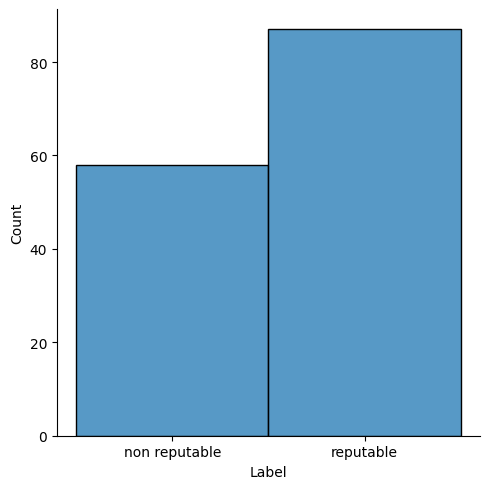

In [373]:
sns.displot(df, x="Label")
df["Label"].value_counts()

Our data is unbalanced so we might need oversampling

In [374]:
# sns.scatterplot(x="commentCount", y="durationSecs", hue="Label", data = df)

# Modeling

In [375]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Label encoding 

In [376]:
le = LabelEncoder()

df2 = ['channelTitle', 'definition', 'caption', 'Label']

df[df2] = df[df2].apply(le.fit_transform)

dffs = ['channelTitle', 'definition', 'caption']
dff[dffs] = dff[dffs].apply(le.fit_transform)



df.head(1)

,channelTitle,viewCount,likeCount,commentCount,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label,pushblishYear,durationSecs,tagCount,title length,description length
0,23,969189.0,11109.0,338.0,0,0,140000,8665833,161,0.008202,0,2019,235.0,412,46,1193


In [377]:
feat_col = ['channelTitle', 'viewCount', 'likeCount', 'definition', 'commentCount', 'caption', 'subscribers', 'totalViews', 'totalVideos', 'avg polarity score', 'pushblishYear', 'durationSecs', 'tagCount', 'description length', 'title length']

X = df[feat_col] # Features
y = df.Label # Target variable

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [379]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [380]:
from sklearn.metrics import classification_report
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

    reputable       0.87      0.93      0.90        14
non reputable       0.95      0.91      0.93        23

     accuracy                           0.92        37
    macro avg       0.91      0.92      0.91        37
 weighted avg       0.92      0.92      0.92        37



In [381]:


print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

Train Accuracy: 0.9166666666666666
Test Accuracy: 0.918918918918919


In [382]:
from random import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())

Mean AUC Score - Logistic Regression:  0.936922883188363


# Testing different models

### Random Forest

In [383]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
kfold = KFold(n_splits=3, random_state=16, shuffle=True) 
scores = cross_val_score(model1, X_train, y_train, cv=kfold, scoring='roc_auc')
print("Mean AUC Score - Random Forest: ", scores.mean())

Mean AUC Score - Random Forest:  0.9838668362081675


In [384]:
# fit the model with data
model1.fit(X_train, y_train)

rf_pred = model1.predict(X_test)

print("Train Accuracy:",model1.score(X_train, y_train))
print("Test Accuracy:",model1.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.8648648648648649


### Decision Tree

In [385]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model2, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Decision Tree: ", scores.mean())

Mean AUC Score - Decision Tree:  0.9312589070716006


In [386]:
# fit the model with data
model2.fit(X_train, y_train)

dc_pred = model2.predict(X_test)

print("Train Accuracy:",model2.score(X_train, y_train))
print("Test Accuracy:",model2.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.8648648648648649


### Gaussian Naive Bayes

In [387]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model4, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Gaussian Naive Bayes: ", scores.mean())

Mean AUC Score - Gaussian Naive Bayes:  0.9213700099923011


In [388]:
# fit the model with data
model4.fit(X_train, y_train)

gn_pred = model4.predict(X_test)

print("Train Accuracy:",model4.score(X_train, y_train))
print("Test Accuracy:",model4.score(X_test, y_test))

Train Accuracy: 0.8425925925925926
Test Accuracy: 0.8378378378378378


### K-Nearest Neighbors

In [389]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model5, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - K-Nearest Neighbors: ", scores.mean())

Mean AUC Score - K-Nearest Neighbors:  0.9562325953773322


In [390]:
# fit the model with data
model5.fit(X_train, y_train)

k_pred = model5.predict(X_test)

print("Train Accuracy:",model5.score(X_train, y_train))
print("Test Accuracy:",model5.score(X_test, y_test))

Train Accuracy: 0.9351851851851852
Test Accuracy: 0.9459459459459459


From the 5 scores above the top 3 performers were Logistic Regression and Random Forest and K-Neasrest Neighbors. We will move ahead and fine tune them.

# Hyper parameters tuning

In [391]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'C': np.linspace(.0001, 1000, 200) , 'penalty': ["l2"]}]
clf = GridSearchCV(logreg, tuned_parameters, cv=cross_val, scoring= 'roc_auc')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print("\nOptimized model achieved an ROC of:", round(clf.score(X_train, y_train), 4))

Best parameters set found on development set:

{'C': 226.13073065326634, 'penalty': 'l2'}

Optimized model achieved an ROC of: 0.9798


# Save model

In [392]:
import pickle

pickle.dump(clf, open('LogRegModel', 'wb'))

# Labelling data using our model

Reindexing

In [393]:
# new_cols = ["channelTitle","title","description","viewCount",'likeCount','definition','commentCount','caption','subscribers','totalViews','totalVideos','total polarity score','pushblishYear','durationSecs','tagCount']
# dff=dff[new_cols]
# #or
# dff=dff.reindex(columns=new_cols)

Labeling

In [394]:
# new_pred = logreg.predict(dff)
# print(new_pred)

Assigning the labels

In [395]:
# dff['Label'] = None

# dff = dff.assign(Label = new_pred)

# dff.to_csv(r'C:\Users\wled3\ytunlabeled3.csv')